<a href="https://colab.research.google.com/github/vipashaaV321/Collaborative-Food-Recipe-Recommendation-System/blob/Vipasha/EDA_Vipasha_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA 

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
Recipes = pd.read_csv("/content/drive/MyDrive/Data/RS2/RAW_recipes.csv")

In [35]:
Interactions  = pd.read_csv('/content/drive/My Drive/Data/RS2/RAW_interactions.csv')

In [36]:
Recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [37]:
Recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [38]:
Recipes.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


In [39]:
Interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [40]:
Interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [41]:
Interactions.describe()

,user_id,recipe_id,rating
count,1.132367e+06,1.132367e+06,1.132367e+06
mean,1.384291e+08,1.608972e+05,4.411016e+00
std,5.014269e+08,1.303987e+05,1.264752e+00
min,1.533000e+03,3.800000e+01,0.000000e+00
25%,1.354700e+05,5.425700e+04,4.000000e+00
50%,3.309370e+05,1.205470e+05,5.000000e+00
75%,8.045500e+05,2.438520e+05,5.000000e+00
max,2.002373e+09,5.377160e+05,5.000000e+00


### Merge Intercations and Recipes data

In [42]:
Merged_Data2 = pd.merge(Recipes,Interactions, how="outer", left_on = 'id', right_on= 'recipe_id')
Merged_Data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   name            1132366 non-null  object
 1   id              1132367 non-null  int64 
 2   minutes         1132367 non-null  int64 
 3   contributor_id  1132367 non-null  int64 
 4   submitted       1132367 non-null  object
 5   tags            1132367 non-null  object
 6   nutrition       1132367 non-null  object
 7   n_steps         1132367 non-null  int64 
 8   steps           1132367 non-null  object
 9   description     1108857 non-null  object
 10  ingredients     1132367 non-null  object
 11  n_ingredients   1132367 non-null  int64 
 12  user_id         1132367 non-null  int64 
 13  recipe_id       1132367 non-null  int64 
 14  date            1132367 non-null  object
 15  rating          1132367 non-null  int64 
 16  review          1132198 non-null  object
dtypes: int64

In [43]:
Merged_Data2.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,178427,137739,2011-12-05,5,Excellent recipe! I used butternut squash and ...
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,28603,31490,2002-08-19,0,"Have not tried this, but it sounds delicious. ..."
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,346277,31490,2006-08-27,5,This recipe was wonderful. Instead of using t...


In [44]:
# Number of users
print('The ratings dataset has', Merged_Data2['user_id'].nunique(), 'unique users')

# Number of recipes
print('The ratings dataset has', Merged_Data2['recipe_id'].nunique(), 'unique recipe')

# Number of ratings
print('The ratings dataset has', Merged_Data2['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(Merged_Data2['rating'].unique()))

The ratings dataset has 226570 unique users
The ratings dataset has 231637 unique recipe
The ratings dataset has 6 unique ratings
The unique ratings are [0, 1, 2, 3, 4, 5]


### best recipe by user ratings and number of reviews

In [45]:
rating = Merged_Data2[['name','rating','recipe_id']].groupby(['recipe_id','name'])['rating'].agg(['mean','count'])\
                                                        .rename(columns={"mean": "average_rating", "count": "No_of_Reviews"})
(rating.sort_values(by = ['average_rating','No_of_Reviews'], ascending= False)).head(n=10)

,,average_rating,No_of_Reviews
recipe_id,name,,
55309,caprese salad tomatoes italian marinated tomatoes,5.0,52
24768,berry cream cheese coffee cake,5.0,37
121941,kittencal s soft white baguette style bread,5.0,36
166669,kittencal s caesar tortellini salad,5.0,36
62754,linda s special potato salad,5.0,32
199171,broiled cinnamon toast,5.0,31
269136,earth bread,5.0,31
45107,strawberry cheese ring,5.0,28
94087,cranberry nut swirls,5.0,28


Pre-processing of the data


In [46]:
NutriList=['cal', 'totalFat', 'sugar', 'sodium', 'protein', 'satFat', 'carbs']

NutriList_Columns = pd.DataFrame(Merged_Data2['nutrition'].apply(eval).to_list(),\
                        index=Merged_Data2.index\
                        ,columns=NutriList)

Merged_Data2 = Merged_Data2.join(NutriList_Columns)
Merged_Data2.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,date,rating,review,cal,totalFat,sugar,sodium,protein,satFat,carbs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,2010-08-21,5,This was a nice change. I used butternut squas...,51.5,0.0,13.0,0.0,2.0,0.0,4.0
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,2011-12-05,5,Excellent recipe! I used butternut squash and ...,51.5,0.0,13.0,0.0,2.0,0.0,4.0
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,2002-08-19,0,"Have not tried this, but it sounds delicious. ...",173.4,18.0,0.0,17.0,22.0,35.0,1.0
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,2006-08-27,5,This recipe was wonderful. Instead of using t...,173.4,18.0,0.0,17.0,22.0,35.0,1.0


In [47]:
### Converting ingredients string to list of ingredients
Merged_Data2['ingredients'] = Merged_Data2['ingredients'].apply(eval)
Merged_Data2['ingredients'].head()
     

0    [winter squash, mexican seasoning, mixed spice...
1    [winter squash, mexican seasoning, mixed spice...
2    [winter squash, mexican seasoning, mixed spice...
3    [prepared pizza crust, sausage patty, eggs, mi...
4    [prepared pizza crust, sausage patty, eggs, mi...
Name: ingredients, dtype: object

In [48]:
### ingradients to text string
Merged_Data2['ingredients'] = [','.join(z).strip() for z in Merged_Data2['ingredients']]
Merged_Data2['ingredients'].head()

0    winter squash,mexican seasoning,mixed spice,ho...
1    winter squash,mexican seasoning,mixed spice,ho...
2    winter squash,mexican seasoning,mixed spice,ho...
3    prepared pizza crust,sausage patty,eggs,milk,s...
4    prepared pizza crust,sausage patty,eggs,milk,s...
Name: ingredients, dtype: object

In [49]:
### https://www.kaggle.com/code/antgoldbloom/most-and-least-popular-recipes-from-food-com

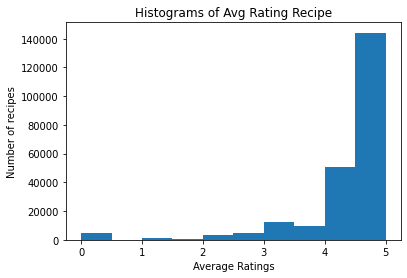

In [50]:
Interactions.groupby('recipe_id')['rating'].mean().reset_index().rating.plot(kind ='hist',title='Histograms of Avg Rating Recipe')
plt.xlabel("Average Ratings")
plt.ylabel("Number of recipes")
plt.show()

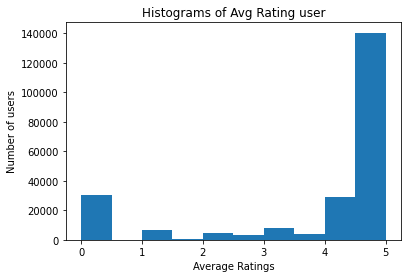

In [77]:
Interactions.groupby('user_id')['rating'].mean().reset_index().rating.plot(kind ='hist',title='Histograms of Avg Rating user')
plt.xlabel("Average Ratings")
plt.ylabel("Number of users")
plt.show()

In [69]:
# df=recipe_rating.drop(['date','u','i'], axis=1)
df=Merged_Data2[['user_id','recipe_id','name','rating']]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   name       1132366 non-null  object
 3   rating     1132367 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 75.4+ MB


In [71]:
# Number of users
print('The ratings dataset has', df['user_id'].nunique(), 'unique users')

# Number of recipes
print('The ratings dataset has', df['recipe_id'].nunique(), 'unique recipes')

# Number of ratings
print('The ratings dataset has', df['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(df['rating'].unique()))

The ratings dataset has 226570 unique users
The ratings dataset has 231637 unique recipes
The ratings dataset has 6 unique ratings
The unique ratings are [0, 1, 2, 3, 4, 5]


In [72]:
# Aggregate by recipe
agg_ratings = df.groupby('name').agg(mean_rating = ('rating', 'mean'),
                                                number_of_ratings = ('rating', 'count')).reset_index()

# Keep the recipe with more than 50 ratings
agg_ratings= agg_ratings[agg_ratings['number_of_ratings']>50]

# Check the information of the dataframe
agg_ratings.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 13 to 229988
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               2100 non-null   object 
 1   mean_rating        2100 non-null   float64
 2   number_of_ratings  2100 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 65.6+ KB


In [73]:
# Check popular recipes
agg_ratings.sort_values(by='number_of_ratings', ascending=False).head()

,name,mean_rating,number_of_ratings
21337,best banana bread,4.186493,1614
212437,to die for crock pot roast,4.288570,1601
64607,crock pot chicken with black beans cream cheese,4.220393,1579
61387,creamy cajun chicken pasta,4.541436,1448
21559,best ever banana cake with cream cheese frosting,4.329047,1322


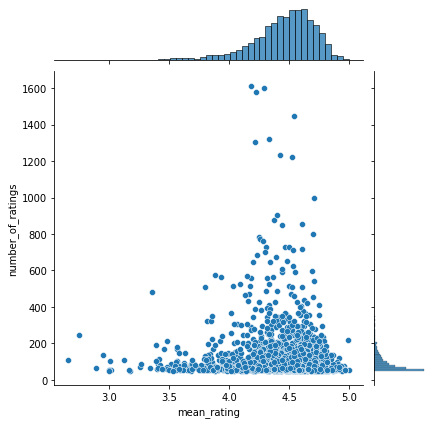

In [74]:
# Visulization
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings)

In [75]:
# Merge data
df = pd.merge(df, agg_ratings[['name']], on='name', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254484 entries, 0 to 254483
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    254484 non-null  int64 
 1   recipe_id  254484 non-null  int64 
 2   name       254484 non-null  object
 3   rating     254484 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 9.7+ MB
